<a href="https://colab.research.google.com/github/royalseeker/hackbio-biocoding-internship/blob/main/Stage2_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task Code 2.4:

**Biochemistry & Oncology**

Proteins structures are known to be strongly connected to their functions. However, at the amino acid level, not all amino acids contribute to structure and function equally. [Galardini and colleagues](https://elifesciences.org/articles/31035#abstract) decided to investigate the impact of all possible individual, non synonymous nonsense mutations on the structure and function of protein.
The functional impact was computed as SIFT scores and the structural impact was calculated as FoldX Score (in kCal/mol).

Dataset Here:
* [SIFT Dataset](https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/sift.tsv)
* [FoldX Dataset](https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/foldX.tsv)

Task

* Import both sift and foldx datasets; in both datasets, create a column `specific_Protein_aa` which will be a cantenation of the Protein and Amino_acid columns such that If you have Protein `A5A607` and Amino_acid `E63D`, you have specific_Protein_aa `A5A607_E63D`
* Using the `specific_Protein_aa` column, merge sift and foldx dataset into one final dataframe.
* According to the authors;
  * A SIFT Score below 0.05 is deleterious
  * A FoldX score greater than 2 kCal/mol is deleterious
* Using the criteria above, Find all mutations that have a SIFT score below 0.05 and FoldX Score above 2 (i.e: Mutations that affect both structure and function)
* Study the amino acid substitution nomenclature
* Investigate for the amino acid that has the most functional and structural impact
  * Hint: Using the amino acid column, find a way to select the first amino acid. Solution [here](https://reactgo.com/r-get-first-character-string/)
  * Generate a frequency table for all the amino acids
* Using the amino frequency table above, generate a barplot and pie chart to represent the frequency of the amino acids.
* Briefly describe the amino acid with the highest impact on protein structure and function
* What can you say about the structural property and functional property of amino acids with more than 100 occurences.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import datasets with correct column handling
columns = ['Protein', 'Amino_Acid', 'SIFT_score']
sift_df = pd.read_csv(
    "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/sift.tsv",
    sep='\t',
    header=None,  # Ignore default header
    names=columns,  # Assign column names manually
    skiprows=1  # Skip the malformed header row
)

columns_foldx = ['Protein', 'Amino_Acid', 'FoldX_score']
foldx_df = pd.read_csv(
    "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/foldX.tsv",
    sep='\t',
    header=None,
    names=columns_foldx,
    skiprows=1
)

# Step 2: Create `specific_Protein_aa` column
sift_df['specific_Protein_aa'] = sift_df['Protein'] + '_' + sift_df['Amino_Acid']
foldx_df['specific_Protein_aa'] = foldx_df['Protein'] + '_' + foldx_df['Amino_Acid']

# Step 3: Merge datasets
merged_df = pd.merge(
    sift_df,
    foldx_df,
    on='specific_Protein_aa',
    suffixes=('_sift', '_foldx')
)

# Step 4: Filter deleterious mutations (SIFT < 0.05 and FoldX > 2)
filtered_df = merged_df[(merged_df['SIFT_score'] < 0.05) & (merged_df['FoldX_score'] > 2)]

# Step 5: Analyze amino acid substitutions
# Extract the original amino acid (first character of 'Amino_Acid' column)
filtered_df['original_aa'] = filtered_df['Amino_Acid_sift'].str[0]

# Generate frequency table for amino acids
aa_counts = filtered_df['original_aa'].value_counts()

aa_counts.head()


<ipython-input-47-c3fa880a2e27>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['original_aa'] = filtered_df['Amino_Acid_sift'].str[0]


,count
original_aa,
G,1307
L,739
A,640
P,470
V,380


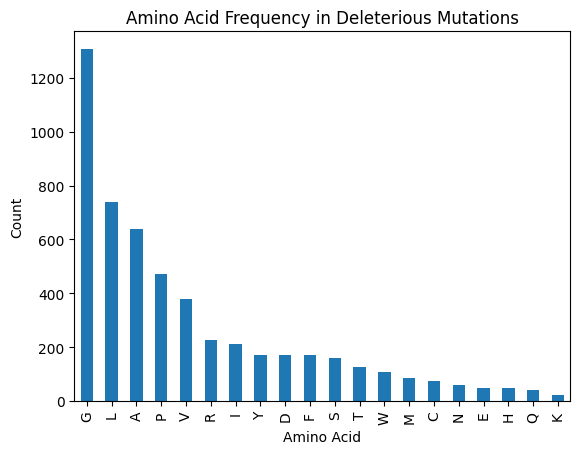

In [ ]:
# Step 6: Visualize frequencies
# Bar plot
aa_counts.plot(kind='bar', title='Amino Acid Frequency in Deleterious Mutations')
plt.xlabel('Amino Acid')
plt.ylabel('Count')
plt.show()



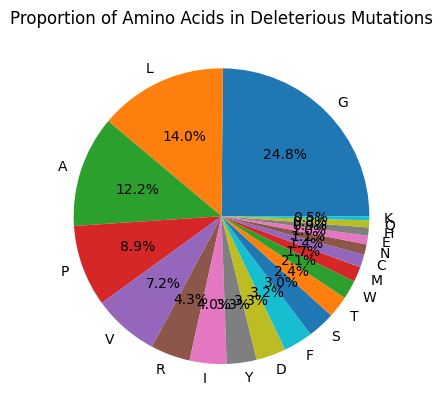

In [ ]:
# Pie chart
aa_counts.plot(kind='pie', autopct='%1.1f%%', title='Proportion of Amino Acids in Deleterious Mutations')
plt.ylabel('')
plt.show()



In [ ]:
# Step 7: Describe the amino acid with the highest impact
most_impactful_aa = aa_counts.idxmax()
most_impactful_count = aa_counts.max()
print(f"The amino acid with the highest functional and structural impact is {most_impactful_aa} with {most_impactful_count} occurrences.")

# Step 8: Analyze amino acids with more than 100 occurrences
high_impact_aas = aa_counts[aa_counts > 100]
print("Amino acids with more than 100 occurrences and their properties:")
print(high_impact_aas)

# Brief description of high-impact amino acids
print("\nBrief description of high-impact amino acids:")
for aa in high_impact_aas.index:
    if aa == 'L':
        print(f"{aa} (Leucine): Hydrophobic, important for protein stability and structure.")
    elif aa == 'R':
        print(f"{aa} (Arginine): Positively charged, involved in salt bridges and hydrogen bonding.")
    elif aa == 'S':
        print(f"{aa} (Serine): Polar, often involved in post-translational modifications.")
    elif aa == 'G':
        print(f"{aa} (Glycine): Small and flexible, often found in tight turns and loops.")
    elif aa == 'P':
        print(f"{aa} (Proline): Rigid, disrupts secondary structures like alpha-helices.")
    else:
        print(f"{aa}: General properties depend on its side chain and role in protein structure.")

The amino acid with the highest functional and structural impact is G with 1307 occurrences.
Amino acids with more than 100 occurrences and their properties:
original_aa
G    1307
L     739
A     640
P     470
V     380
R     227
I     212
Y     172
D     171
F     169
S     158
T     126
W     108
Name: count, dtype: int64

Brief description of high-impact amino acids:
G (Glycine): Small and flexible, often found in tight turns and loops.
L (Leucine): Hydrophobic, important for protein stability and structure.
A: General properties depend on its side chain and role in protein structure.
P (Proline): Rigid, disrupts secondary structures like alpha-helices.
V: General properties depend on its side chain and role in protein structure.
R (Arginine): Positively charged, involved in salt bridges and hydrogen bonding.
I: General properties depend on its side chain and role in protein structure.
Y: General properties depend on its side chain and role in protein structure.
D: General propertie

In [ ]:
#Github
#https://github.com/mahertantouch/
#https://github.com/royalseeker/